In [118]:
import sklearn as sk
from sklearn import preprocessing
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [119]:
df = [pd.read_csv('../HackathonData/T2D/ClassT2D_train.csv'), pd.read_csv('../HackathonData/IBD/ClassIBD_train.csv'), pd.read_csv('../HackathonData/CAD/ClassCAD_train.csv'), pd.read_csv('../HackathonData/CKD/ClassCKD_train.csv')]
df = pd.concat([x if x['label'].replace(1, idx, inplace=True) == True else x for idx, x in enumerate(df)], join="outer", axis=0).fillna(0).drop_duplicates()
df

,sample_ID,Bacteria;Abditibacteriota;Abditibacteria,Bacteria;Acidobacteriota;Aminicenantia,Bacteria;Acidobacteriota;Blastocatellia,Bacteria;Acidobacteriota;Subgroup 19,Bacteria;Acidobacteriota;Vicinamibacteria,Bacteria;Actinobacteriota;Acidimicrobiia,Bacteria;Actinobacteriota;Actinobacteria,Bacteria;Actinobacteriota;Coriobacteriia,Bacteria;Actinobacteriota;Thermoleophilia,...,Bacteria;Patescibacteria;Saccharimonadia,Bacteria;Proteobacteria;Alphaproteobacteria,Bacteria;Proteobacteria;Gammaproteobacteria,Bacteria;Spirochaetota;Brachyspirae,Bacteria;Spirochaetota;Spirochaetia,Bacteria;Synergistota;Synergistia,Bacteria;Verrucomicrobiota;Lentisphaeria,Bacteria;Verrucomicrobiota;Verrucomicrobiae,label,Bacteria;Acidobacteriota;Subgroup 5
0,H34099,0,0,0,0.0,0.0,0,148,818,0,...,2,0,4973,0,0,0,0,2,0,0.0
1,H26094,0,0,0,0.0,0.0,0,0,9,0,...,0,0,6592,0,0,0,0,0,0,0.0
2,H26935,0,0,0,0.0,0.0,0,2,35,0,...,4,0,1678,0,0,0,0,0,0,0.0
3,H25822,0,0,0,0.0,0.0,0,4,22,0,...,0,2,1622,0,0,0,0,1,0,0.0
4,H27104,0,0,0,0.0,0.0,0,3,11,0,...,0,0,361,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,H27419,0,0,0,0.0,0.0,0,25,1209,0,...,3,0,10642,0,0,0,0,3,3,0.0
469,H27430,0,0,0,0.0,0.0,0,9,450,0,...,0,10,12318,0,0,0,0,0,3,0.0
485,H26690,0,0,0,0.0,0.0,0,35,549,0,...,18,5,93,0,0,0,0,0,3,0.0
498,H28044,0,0,0,0.0,0.0,0,3,140,0,...,0,0,116,0,0,0,0,0,3,0.0


### Data preparation

### PCA

In [120]:
# Remove the label and sample_id column
dfS = df.drop('label', axis=1)
dfS = dfS.drop('sample_ID', axis=1)
#normalizing the features
x = sk.preprocessing.StandardScaler().fit_transform(dfS)
pca = sk.decomposition.PCA(n_components=47)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_ * 100

array([4.66404589e+00, 4.31225354e+00, 4.25970199e+00, 3.77912961e+00,
       3.65219426e+00, 3.20110271e+00, 3.04996116e+00, 2.92702764e+00,
       2.78797878e+00, 2.63628142e+00, 2.61914738e+00, 2.47697176e+00,
       2.44081389e+00, 2.36269061e+00, 2.29073973e+00, 2.23026075e+00,
       2.21954395e+00, 2.17649613e+00, 2.17001171e+00, 2.15383236e+00,
       2.14983485e+00, 2.14494265e+00, 2.13367121e+00, 2.12671491e+00,
       2.12334133e+00, 2.08911927e+00, 2.07772359e+00, 2.02099242e+00,
       2.01317200e+00, 1.90531363e+00, 1.89425338e+00, 1.84787647e+00,
       1.78397553e+00, 1.70269499e+00, 1.61970569e+00, 1.55208825e+00,
       1.42818678e+00, 1.36252102e+00, 1.27624843e+00, 1.22123878e+00,
       1.21016945e+00, 1.13326659e+00, 9.67099188e-01, 7.92701996e-01,
       5.19171818e-01, 4.93790491e-01, 1.11938282e-28])

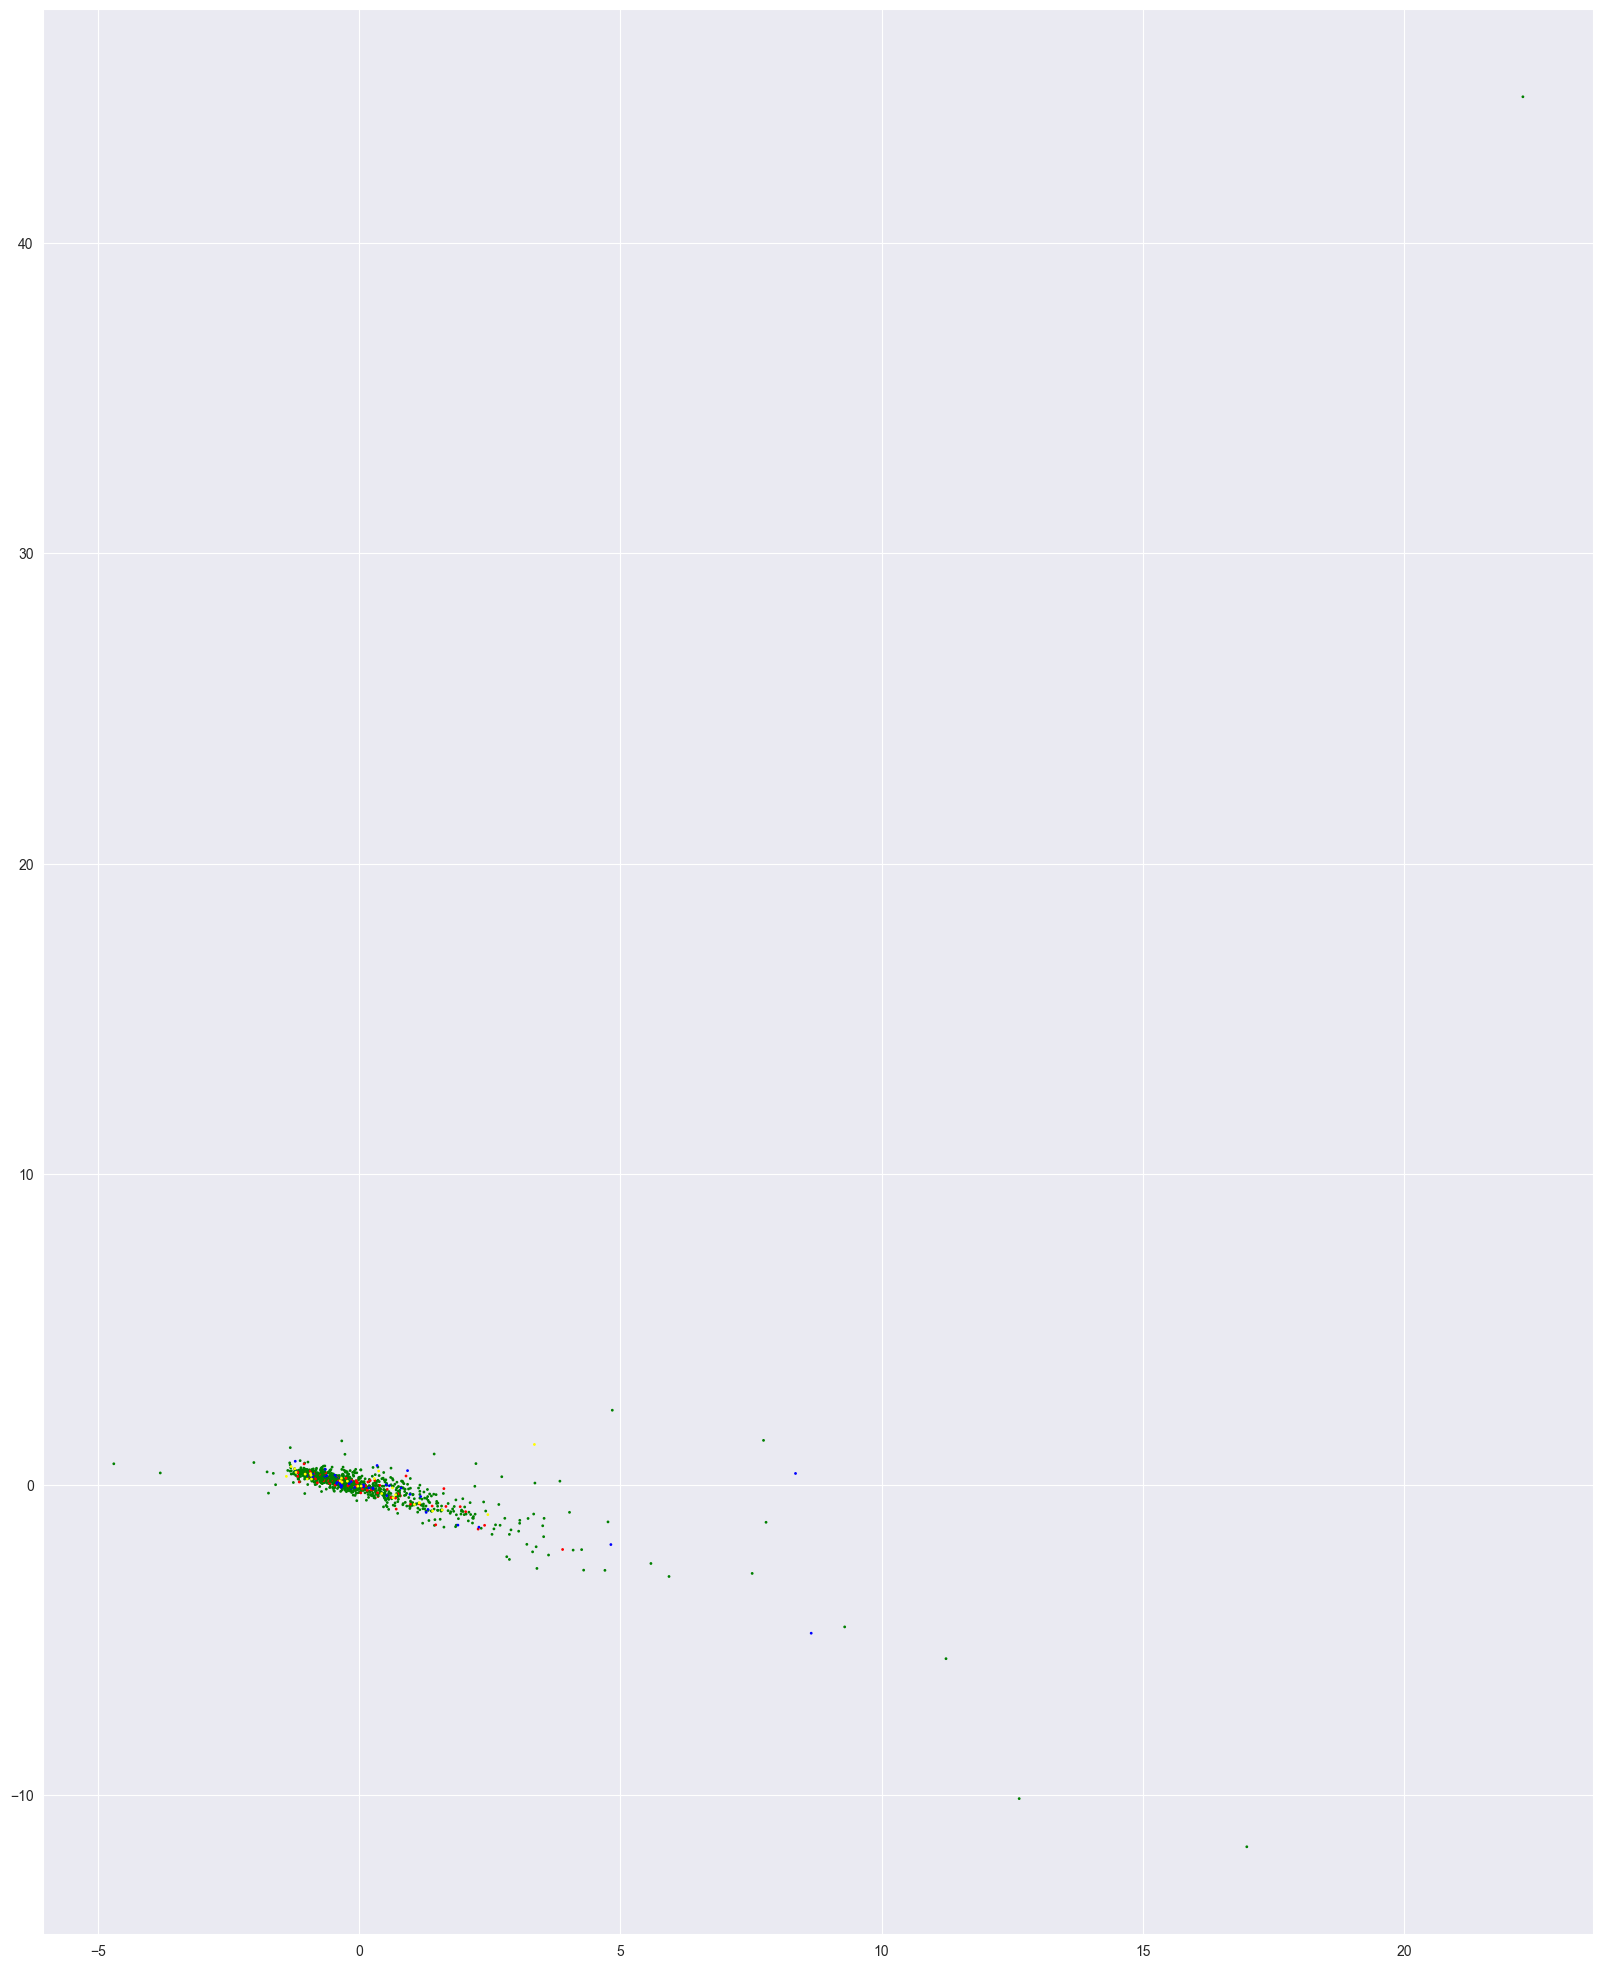

In [121]:
# Plot PCA Features
colors = {0:'green', 1:'red', 2:'blue', 3:'yellow', 4:'black'}
def plot_scatter():
    fig = plt.figure(figsize=(20, 25))
    ax = fig.add_subplot() #projection='3d'
    #xs = scores_df.iloc[:,0]
    #ys = scores_df.iloc[:,1]
    #n=scores_df.shape[1]
    # scaling x and y
    #scalex = 1.0/(xs.max()- xs.min())
    #scaley = 1.0/(ys.max()- ys.min())
    ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df['label'].map(colors), s=1)
    #plt.scatter(pc1, pc2, c = 'g')
    plt.show()

plot_scatter()

In [122]:
'''
n_bins = 30
dfS['label'] = df['label']
pos = dfS[dfS.label == 1]
neg = dfS[dfS.label == 0]
fig, axs = plt.subplots(1, 20, sharey=True, tight_layout=True, figsize=(20, 20))
# We can set the number of bins with the *bins* keyword argument.
count = 0
count2= 0
while count < 18:
    axs[0+count].hist(pos.iloc[:, (int)(1+count2)], bins=n_bins)
    axs[1+count].hist(neg.iloc[:, (int)(1+count2)], bins=n_bins)
    count+=2
    count2+=1
'''

"\nn_bins = 30\ndfS['label'] = df['label']\npos = dfS[dfS.label == 1]\nneg = dfS[dfS.label == 0]\nfig, axs = plt.subplots(1, 20, sharey=True, tight_layout=True, figsize=(20, 20))\n# We can set the number of bins with the *bins* keyword argument.\ncount = 0\ncount2= 0\nwhile count < 18:\n    axs[0+count].hist(pos.iloc[:, (int)(1+count2)], bins=n_bins)\n    axs[1+count].hist(neg.iloc[:, (int)(1+count2)], bins=n_bins)\n    count+=2\n    count2+=1\n"